In [233]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime

In [234]:
allMeasures = pd.read_csv("measurementsMFP.csv")


In [235]:
diff = allMeasures.shape[0] 
allMeasures['daysIn'] = allMeasures.index
ticks = pd.date_range(start = allMeasures.loc[0,'Date'],end = allMeasures.loc[allMeasures.shape[0]-1,'Date'],periods = 10)
#ticks.strftime('%Y-%m-%d')
start_, end_ = allMeasures.loc[0,'Date'] , allMeasures.loc[allMeasures.shape[0]-1,'Date']
print(start_, end_)
allMeasures['avg7Weight'] = allMeasures.rolling(7,min_periods=3)['Weight'].mean(skipna=True)
allMeasures['avg90Weight'] = allMeasures.rolling(90,min_periods=15)['Weight'].mean(skipna = True)

# allMeasures['Dates_'] = pd.period_range(start_ ,end_ , periods = 10)
# allMeasures['Dates_']
allMeasures['Date'] = pd.to_datetime(allMeasures['Date'])
allMeasures

#allMeasures['2014-09-25', 'Weight']
# allMeasures[allMeasures['Date'] == '2018-09-25']['Weight']


2012-09-05 2021-10-18


,Date,Body Fat %,Fitbit steps,Fitbit tracked sleep minutes,Neck,Waist,Weight,daysIn,avg7Weight,avg90Weight
0,2012-09-05,NaN,NaN,NaN,NaN,NaN,168.0,0,NaN,NaN
1,2012-09-14,NaN,NaN,NaN,NaN,NaN,163.5,1,NaN,NaN
2,2012-09-16,NaN,NaN,NaN,NaN,NaN,165.0,2,165.500000,NaN
3,2012-09-17,NaN,NaN,NaN,NaN,NaN,167.0,3,165.875000,NaN
4,2012-09-18,NaN,NaN,NaN,NaN,NaN,167.0,4,166.100000,NaN
...,...,...,...,...,...,...,...,...,...,...
3242,2021-10-14,8.04,0.0,NaN,NaN,NaN,153.0,3242,153.460000,154.462687
3243,2021-10-15,4.18,0.0,NaN,NaN,NaN,153.0,3243,153.383333,154.441791
3244,2021-10-16,NaN,0.0,NaN,NaN,NaN,NaN,3244,153.320000,154.460606
3245,2021-10-17,NaN,0.0,NaN,NaN,NaN,154.0,3245,153.433333,154.434848


/var/folders/hk/8yhk12y94z7fwn097_d9fzjh0000gp/T/ipykernel_98676/717302468.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


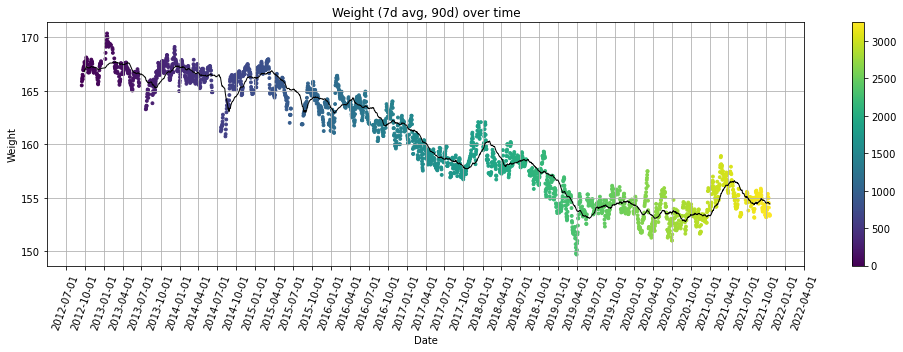

In [237]:
# allMeasures.plot.scatter(x='Date',y='Weight',s=1,figsize=(14, 5),
#     c='daysIn',cmap = 'viridis',title = 'Weight (lb) vs. Day', 
#         xticks=allMeasures['Date'], rot=90, grid = False)

days_range = allMeasures.shape[0]
fig = plt.figure(figsize=(14,5)) #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

xval = 'Date'
yval = 'avg7Weight'
y2val = 'avg90Weight'
x = allMeasures[xval]  #convert data to numpy array
y = allMeasures[yval]
y2 = allMeasures[y2val]
coloring = allMeasures['daysIn']

ax1.scatter(x, y,c=coloring,cmap = 'viridis',label=coloring,s=8) #plot data points in scatter plot on ax1
ax1.plot(x,y2,color = 'black',linewidth=1)
xmin, xmax = ax1.get_xlim()


#ax1.set_xticks(np.arange(0, np.round(xmax), 1)) 
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval = 3))
# ax1.text(0.0, 0.1, "StrMethodFormatter('{x}')",
#         fontsize=15, transform=ax1.transAxes)
ax1.tick_params(axis='x', rotation=70)
ax1.grid()

ax1.set_title("Weight (7d avg, 90d) over time")
ax1.set_xlabel('Date')
ax1.set_ylabel('Weight')

#This took me way longer than it should have to figure out...
norm = matplotlib.colors.Normalize(vmin=0, vmax=days_range, clip=False)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax1)

fig.tight_layout()
fig.show()